# Solutions for Lab Sheet 6 (COM3502-4502-6502 Speech Processing)

This lab sheet (solution) is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-6-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [20]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

# imports we need in addition for this lab sheet
from IPython import display as ipd

## The Chirp Signal, a.k.a. Sweep Signal

The function 
\begin{equation}
x_{\mathrm{chirp}}(t)=\sin\left(\pi t^2\right) \tag{1}
\end{equation}
defines the so-called **linear-frequency [chirp](https://en.wikipedia.org/wiki/Chirp "Click here for additional information on the Chirp signal on Wikipedia")** or simply linear chirp. It is a signal that sweeps through diffrent frequencies over time.

The instantaneous frequency $f(t)$ of this chirp signal increases exactly linearly with time, i.e. $f(t)=f_0+ a t$ with a constant $a=\frac{f_1-f_0}{t_1-t_0}$. More precisely, the instantaneous angular frequency $\omega(t)$ of the chirp signal at time $t$ is the derivate of the sinusoid's argument divided by $2\pi$, thus $\omega(t) = t$. 

In [1]:
def nextPowerOf2(L):
    '''
    Calculates the smallest power of 2 which is bigger than input variable n
    
    This helper function can be used to calculate an appropriate 
    length for an DFT which is longer than the signal length n and a power of 2.
    
    Input:
        L: int
            signal length
    Output:
        p: integer which is greater or equal than n and a power of 2
    
    Example:
        for L in range(20):
            print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))
    '''
    if (L<2):
        return 2
    # If n is a power of 2 then return n 
    if (L and not(L & (L - 1))):
        return L
    # If n is NOT a power of 2 
    p = 1
    while (p < L) :
        p <<= 1 
    return p

for L in range(20):
    print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))

nextPowerOf2(L) for L=0 is 2
nextPowerOf2(L) for L=1 is 2
nextPowerOf2(L) for L=2 is 2
nextPowerOf2(L) for L=3 is 4
nextPowerOf2(L) for L=4 is 4
nextPowerOf2(L) for L=5 is 8
nextPowerOf2(L) for L=6 is 8
nextPowerOf2(L) for L=7 is 8
nextPowerOf2(L) for L=8 is 8
nextPowerOf2(L) for L=9 is 16
nextPowerOf2(L) for L=10 is 16
nextPowerOf2(L) for L=11 is 16
nextPowerOf2(L) for L=12 is 16
nextPowerOf2(L) for L=13 is 16
nextPowerOf2(L) for L=14 is 16
nextPowerOf2(L) for L=15 is 16
nextPowerOf2(L) for L=16 is 16
nextPowerOf2(L) for L=17 is 32
nextPowerOf2(L) for L=18 is 32
nextPowerOf2(L) for L=19 is 32


**TODO** PUT CHIRP CODE IN A FUNCTION

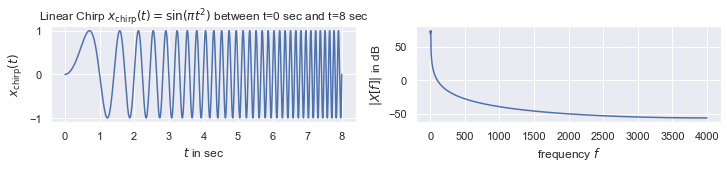

In [22]:
fs=8000      # sampling frequency
t1=0         # time 1 in seconds
t2=8        # time 2 in seconds
length=t2-t1 # signlal length in seconds

# create time vector from t1 to t2
t = np.linspace(t1, t2, length*fs) # time vector from t1 to t2
# create chirp signal
x = np.sin(np.pi*t**2)

# plot chirp signal
plt.figure(figsize=(12, 6))
plt.subplot(3,2,1)
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

# compute and plot magnitude spectrum
L_FFT=nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT, d=1./fs)

plt.subplot(3,2,2)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
#plt.ylim([0, 50])
plt.grid(True)


# listen to the sound file
ipd.Audio(x, rate=fs)

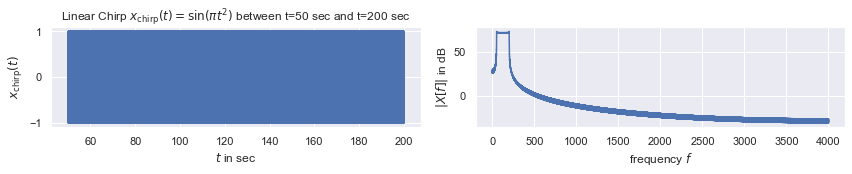

In [23]:
t1=50        # time 1 in seconds
t2=200        # time 2 in seconds
length=t2-t1 # signlal length in seconds

# create time vector from t1 to t2
t = np.linspace(t1, t2, length*fs) # time vector from t1 to t2
# create chirp signal
x = np.sin(np.pi*t**2)

# plot chirp signal
plt.figure(figsize=(12, 6))
plt.subplot(3,2,3)
plt.plot(t,x)
plt.ylabel('$x_{\mathrm{chirp}}(t)$')
plt.xlabel('$t$ in sec')
plt.title('Linear Chirp $x_{\mathrm{chirp}}(t)=\mathrm{sin}(\pi t^2)$ between t='+str(t1)+' sec and t='+str(t2)+' sec')

# compute and plot magnitude spectrum
L_FFT=nextPowerOf2(len(x))
X = np.fft.rfft(x,n=L_FFT)
f = np.fft.rfftfreq(L_FFT, d=1./fs)

plt.subplot(3,2,4)
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel('frequency $f$')
plt.ylabel('$|X[f]|$ in dB')
#plt.ylim([0, 50])
plt.grid(True)


plt.tight_layout()

# listen to the sound file
ipd.Audio(x, rate=fs)

### Task 2
Chrips with SciPy's chirp function.

SOMETHING IS STILL WRONG WITH THE 2nd SPECTROGRAM.

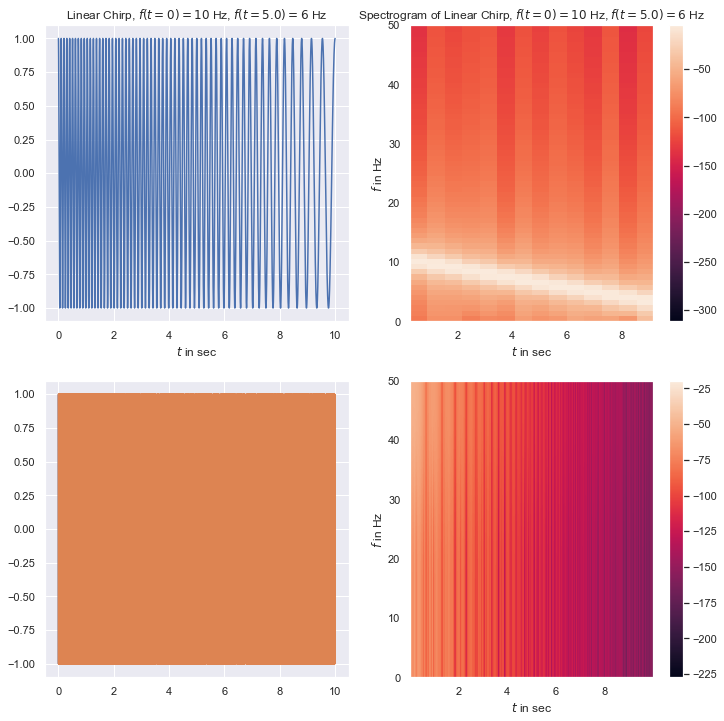

In [36]:
import scipy.signal as sig

fs=8000   # sampling frequency
length=10 # signlal length in seconds

t = np.linspace(0, length, length*fs) # time vector

f0 = 10         # frequency in Hz at time t_0=0
f1 = 6          # frequency in Hz at time t_1
t1 = 0.5*length # frequency in Hz at time t=0
chp1 = sig.chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

# plot time domain chirp
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(t, chp1)
plt.title('Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.xlabel('$t$ in sec')

# plot spectrogram of chirp
plt.subplot(2,2,2)
L = 9192        # DFT length (we need a relatively large number here for high frequency resolution)
overlap = 4096  # also large overlap to get some time resolution between segments
plt.specgram(chp1,NFFT=L, Fs=fs, noverlap=overlap)
plt.colorbar()  # add a colorbar to the spectrogram
plt.ylim(0,50)
plt.grid(False)
plt.title('Spectrogram of Linear Chirp, $f(t=0)='+str(f0)+'$ Hz, $f(t='+str(t1)+')='+str(f1)+'$ Hz')
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')

f0 = 100     # frequency in Hz at time t_0=0
f1 = 3000    # frequency in Hz at time t_1
t1 = length  # frequency in Hz at time t=0

chp2 = sig.chirp(t, f0=f0, f1=f1, t1=length, method='logarithmic')


plt.subplot(2,2,3)
plt.plot(t[1:160], chp2[1:160])
plt.plot(t, chp2)
#plot_spectrogram(f'Logarithmic Chirp, f(0)=1500, f({T})=250', w, fs)

# plot spectrogram of chirp
plt.subplot(2,2,4)
L = 9192        # DFT length (we need a relatively large number here for high frequency resolution)
overlap = 4096  # also large overlap to get some time resolution between segments
plt.specgram(chp2,Fs=fs)
plt.colorbar()  # add a colorbar to the spectrogram
plt.ylim(0,50)
plt.grid(False)
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')
None # to suppress last output

#ipd.Audio(chp1, rate=fs)
ipd.Audio(chp2, rate=fs)

### Spectrogram vs. Spectrum of Chirp Signal

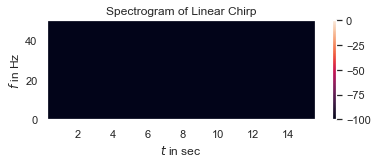

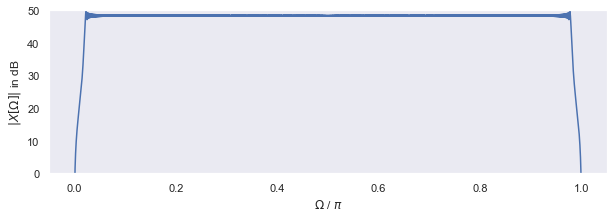

In [25]:
plt.subplot(2,1,2)
L = 9192        # DFT length (we need a relatively large number here for high frequency resolution)
overlap = 4096  # also large overlap to get some time resolution between segments

plt.specgram(x,NFFT=L, Fs=fs, noverlap=overlap)
plt.grid(False)
plt.ylim(0,50)
plt.colorbar()  # add a colorbar to the spectrogram
plt.clim(-100,0)
plt.title('Spectrogram of Linear Chirp')
plt.ylabel('$f$ in Hz')
plt.xlabel('$t$ in sec')


import scipy.signal as sig
L_FFT = nextPowerOf2(len(x))  # length of the signal

# generate signal
k = np.arange(N)
x = sig.chirp(k, 0.01, L_FFT, .49)

# compute and plot magnitude spectrum
plt.figure(figsize=(10, 3))
f = np.fft.rfftfreq(N, 1/2)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x))))
plt.xlabel(r'$\Omega$ / $\pi$')
plt.ylabel(r'$|X[\Omega]|$ in dB')
plt.ylim([0, 50])
plt.grid()

ipd.Audio(x, rate=fs)

In [37]:
## create 5 second chirp signal with the following parameters.

# chirp between 10 and 30 Hz
sf = 1000 # sampling frequency
dt = 1/sf
time = np.arange(0,5,dt)
Nyquist = sf/2 

# Define a chirp function like Udemy curse
f = (10,30) # frequencies in Hz
ff = np.linspace(f[0], np.mean(f), time.size)
signal1 = np.sin(2*np.pi*ff*time)

# chirp betwen 2 and 20 Hz
signal2 = sig.chirp(time, f0=2, f1=20, dur =5)

# Fourier Transform of the first signal
fsignal1 = np.fft.fft(signal1)/signal1.size
Nsamples = int(np.floor(signal1.size/2))
hz = np.linspace(0, Nyquist, Nsamples +1)
amp1 = 2*np.abs(fsignal1)

# Fourier Transform of the second signal
fsignal2 = np.fft.fft(signal2)/signal2.size
amp2 = 2*np.abs(fsignal2)

fig, ax = plt.subplots(2,2, figsize = (16,4))#

ax[0,0].plot(time, signal1, lw = 1, color='C0')
ax[0,0].set_ylim(-1.5,1.5)
ax[0,0].set_xlabel('Time (sec)')
ax[0,0].set_title('Chirp 10 to 30 Hz')

ax[0,1].plot(time, signal2, lw =1, color='C1')
ax[0,1].set_ylim(-1.5,1.5)
ax[0,1].set_xlabel('Time (sec)')
ax[0,1].set_title('Chirp 2 to 20 Hz')
    
ax[1,0].plot(hz, amp1[:hz.size], color = 'C0', lw=1)
ax[1,0].set_xlim(xmin = 0, xmax =50)
ax[1,0].set_xlabel('Frequency (Hz)')

ax[1,1].plot(hz, amp2[:hz.size], color = 'C1', lw=1)
ax[1,1].set_xlim(xmin = 0, xmax =50)
ax[1,1].set_xlabel('Frequency (Hz)');

TypeError: chirp() got an unexpected keyword argument 'dur'

### Colorbars for Spectrograms and Controlling the Colorbar
Using the module `gridspec` allows to align plots that have elements with and without a colorbar. This is demonstrated by the following example, which uses the gridspec-constructor with keywords specified by the dictionary gridspec_kw. This dictionary, in turn, is one of the parameters of plt.subplots, which creates a figure and a set of subplots.

ValueError: x and y must have same first dimension, but have shapes (1200000,) and (131072,)

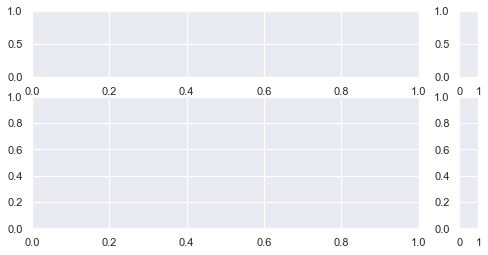

In [26]:
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios':  [1, 0.05], 
                                          'height_ratios': [1, 2]}, figsize=(8, 4))
im = ax[0, 0].plot(t, x, color='gray')
ax[0, 0].set_xlabel('Time (seconds)')
ax[0, 0].set_ylabel('Amplitude')

ax[0, 0].set_xlim([t1, t2])
#ax[0, 0].set_ylim([-0.40, 0.40])
ax[0, 1].set_axis_off() # do not display the axis in right upper corner


spec,_,_,im = ax[1, 0].specgram(x,NFFT=L, Fs=fs, noverlap=overlap)
#im = ax[1, 0].imshow(10*np.log10(spec), aspect='auto', origin='lower', extent=[t1, t2, 0, 50])
plt.colorbar(mappable=im, cax=ax[1, 1])
ax[1, 0].set_xlabel('Time (seconds)')
ax[1, 0].set_ylabel('$f$ in Hz')
ax[1, 0].grid(False)
ax[1, 1].set_ylabel('Magnitude')

plt.tight_layout()

## Overlap-Add

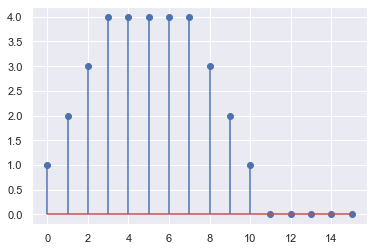

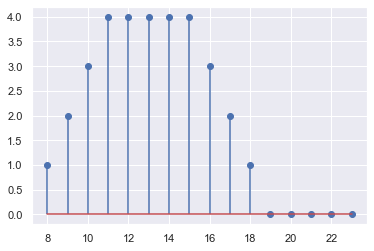

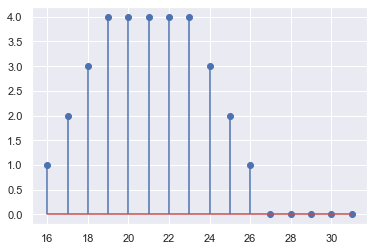

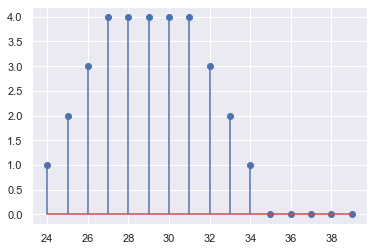

In [27]:

 


L_x = 32
L_h = 4
x=np.ones(L_x)
h=np.ones(L_h)

L_Bl  = 8   # block length (see Fig 2.25 in https://staffwww.dcs.shef.ac.uk/people/S.Goetze/book/Ch2.S3.html)
L_hop = 8
L_DFT = nextPowerOf2(L_Bl+L_h-1)
# L_DFT = 16

noOfFrames = (L_x // L_hop) # number of blocks

# outer loop over mic channels
# h = np.zeros(L_DFT)
# h[:L_h] = h
H = np.fft.rfft(h, n=L_DFT)
oldBlock = []
for iFrame in range(noOfFrames):
  #x_block = np.zeros(L_DFT) # zero padding # not needed
  k = np.arange(iFrame*L_hop, iFrame*L_hop+L_Bl) # time vector
  x_block = x[k]
  # k = np.hstack((k,np.zeros(L_DFT-len(k))))  # zero padding
  X_block = np.fft.rfft(x_block, n=L_DFT)

  Y = X_block*H # frequency domain multiplication
  y = np.fft.irfft(Y, n=L_DFT)

  k2 = np.arange(iFrame*L_hop, iFrame*L_hop+L_DFT) # time vector
  plt.figure()
  plt.stem(k2,y)